In [1]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import pandas as pd
import numpy as np
#pip install folium

import folium
from folium.plugins import MarkerCluster
pd.set_option('display.max_columns', 500) # default is 20

In [2]:
#Εισαγωγή των δεδομένων των καταχωρήσεων
file_path = r'C:\Users\marth\OneDrive - aueb.gr\MAP_aueb\3rd_trimester\Μηχανική μάθηση και τεχνητή νοημοσύνη στην οικονομία και την επιχειρηματικότητα\Homework\homework_python\listings.csv'
listings = pd.read_csv(file_path)

In [3]:
listings.head(3)

id                         listing_url       scrape_id last_scraped  \
0  10595  https://www.airbnb.com/rooms/10595  20211223003724   2021-12-23   
1  10990  https://www.airbnb.com/rooms/10990  20211223003724   2021-12-23   
2  10993  https://www.airbnb.com/rooms/10993  20211223003724   2021-12-23   

                                           name  \
0           96m2, 3BR, 2BA, Metro, WI-FI etc...   
1  Athens Quality Apartments - Deluxe Apartment   
2            Athens Quality Apartments - Studio   

                                         description  \
0  Athens Furnished Apartment No6 is 3-bedroom ap...   
1  Athens Quality Apartments - Deluxe apartment i...   
2  The Studio is an <br />-excellent located <br ...   

                               neighborhood_overview  \
0  Ampelokipi district is nice multinational and ...   
1  Ampelokipi district is nice multinational and ...   
2  Ampelokipi district is nice multinational and ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f7e19a44-5afe...    37177   
1  https://a0.muscache.com/pictures/8645179/c1728...    37177   
2  https://a0.muscache.com/pictures/107309527/848...    37177   

                                  host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   
1  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   
2  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   

            host_location                                         host_about  \
0  Athens, Attica, Greece  Athens Quality Apartments is a company started...   
1  Athens, Attica, Greece  Athens Quality Apartments is a company started...   
2  Athens, Attica, Greece  Athens Quality Apartments is a company started...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  99%   
1     within an hour               100%                  99%   
2     within an hour               100%                  99%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/859c1...   
1                 t  https://a0.muscache.com/im/pictures/user/859c1...   
2                 t  https://a0.muscache.com/im/pictures/user/859c1...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
1  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
2  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   

   host_listings_count  host_total_listings_count  \
0                  6.0                        6.0   
1                  6.0                        6.0   
2                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
0                      t  Athens, Attica, Greece            ΑΜΠΕΛΟΚΗΠΟΙ   
1                      t  Athens, Attica, Greece            ΑΜΠΕΛΟΚΗΠΟΙ   
2                      t  Athens, Attica, Greece            ΑΜΠΕΛΟΚΗΠΟΙ   

   neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                           NaN  37.98863   23.76527  Entire rental unit   
1                           NaN  37.98903   23.76448  Entire rental unit   
2                           NaN  37.98888   23.76473  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             8        NaN        2 baths       3.0   5.0   
1  Entire home/apt             4        NaN 

In [4]:
listings.shape

(9673, 74)

In [5]:
listings.isnull().any(axis=1).sum()

9673

In [6]:
 listings[['neighbourhood_group_cleansed','bathrooms','calendar_updated']].head()

neighbourhood_group_cleansed  bathrooms  calendar_updated
0                           NaN        NaN               NaN
1                           NaN        NaN               NaN
2                           NaN        NaN               NaN
3                           NaN        NaN               NaN
4                           NaN        NaN               NaN

In [7]:
 listings[['neighbourhood_group_cleansed','bathrooms','calendar_updated']].isnull().sum()

neighbourhood_group_cleansed    9673
bathrooms                       9673
calendar_updated                9673
dtype: int64

In [8]:
listings = listings.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated'],1)

C:\Users\marth\AppData\Local\Temp\ipykernel_17632\2742158231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  listings = listings.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated'],1)


In [9]:
listings.isnull().any(axis=1).sum()
listings[listings.isnull().any(axis=1)].head(2)

id                         listing_url       scrape_id last_scraped  \
2  10993  https://www.airbnb.com/rooms/10993  20211223003724   2021-12-23   
4  27262  https://www.airbnb.com/rooms/27262  20211223003724   2021-12-23   

                                 name  \
2  Athens Quality Apartments - Studio   
4  54m2, 1-br, cable tv, wi-fi, metro   

                                         description  \
2  The Studio is an <br />-excellent located <br ...   
4  Big 1-bedroom apartment that can accommodate 4...   

                               neighborhood_overview  \
2  Ampelokipi district is nice multinational and ...   
4                                                NaN   

                                         picture_url  host_id  \
2  https://a0.muscache.com/pictures/107309527/848...    37177   
4  https://a0.muscache.com/pictures/8651803/4b82b...    37177   

                                  host_url  host_name  host_since  \
2  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   
4  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   

            host_location                                         host_about  \
2  Athens, Attica, Greece  Athens Quality Apartments is a company started...   
4  Athens, Attica, Greece  Athens Quality Apartments is a company started...   

  host_response_time host_response_rate host_acceptance_rate  \
2     within an hour               100%                  99%   
4     within an hour               100%                  99%   

  host_is_superhost                                 host_thumbnail_url  \
2                 t  https://a0.muscache.com/im/pictures/user/859c1...   
4                 t  https://a0.muscache.com/im/pictures/user/859c1...   

                                    host_picture_url host_neighbourhood  \
2  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
4  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   

   host_listings_count  host_total_listings_count  \
2                  6.0                        6.0   
4                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
2                      t  Athens, Attica, Greece            ΑΜΠΕΛΟΚΗΠΟΙ   
4                      t                     NaN            ΑΜΠΕΛΟΚΗΠΟΙ   

   latitude  longitude       property_type        room_type  accommodates  \
2  37.98888   23.76473  Entire rental unit  Entire home/apt             2   
4  37.98924   23.76500  Entire rental unit  Entire home/apt             4   

  bathrooms_text  bedrooms  beds  \
2         1 bath       NaN   1.0   
4         1 bath       1.0   1.0   

                                           amenities   price  minimum_nights  \
2  ["Long term stays allowed", "Hot water", "Show...  $38.00               1   
4  ["Long term stays allowed", "Hot water", "Show...  $52.00               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
2            1125                       2                       8   
4            1125                       1                       8   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
2                    1125                    1125                     2.2   
4                    1125                    1125                     2.0   

   maximum_nights_avg_ntm has_availability  availability_30  availability_60  \
2                  1125.0                t               14               28   
4                  1125.0                t               23               53   

   availability_90  availability_365 calendar_last_scraped  number_of_reviews  \
2               58               312            2021-12-23     

In [10]:
row_number = listings.shape[0]
for col in listings.columns:
  number_of_nulls = listings[col].isnull().sum()
  if number_of_nulls>0 :
    percentage = number_of_nulls/row_number
    print(f'{col} : {number_of_nulls} nulls - {100*percentage}%')

name : 3 nulls - 0.031014163134498084%
description : 88 nulls - 0.9097487852786105%
neighborhood_overview : 3116 nulls - 32.21337744236535%
host_name : 1 nulls - 0.010338054378166029%
host_since : 1 nulls - 0.010338054378166029%
host_location : 17 nulls - 0.17574692442882248%
host_about : 4216 nulls - 43.58523725834798%
host_response_time : 1660 nulls - 17.161170267755608%
host_response_rate : 1660 nulls - 17.161170267755608%
host_acceptance_rate : 1491 nulls - 15.414039077845548%
host_is_superhost : 1 nulls - 0.010338054378166029%
host_thumbnail_url : 1 nulls - 0.010338054378166029%
host_picture_url : 1 nulls - 0.010338054378166029%
host_neighbourhood : 2669 nulls - 27.592267135325134%
host_listings_count : 1 nulls - 0.010338054378166029%
host_total_listings_count : 1 nulls - 0.010338054378166029%
host_has_profile_pic : 1 nulls - 0.010338054378166029%
host_identity_verified : 1 nulls - 0.010338054378166029%
neighbourhood : 3116 nulls - 32.21337744236535%
bathrooms_text : 8 nulls - 0.0

In [11]:
host_multiplicity = listings.groupby('host_id').size().to_frame(name='counts').reset_index()
host_multiplicity.groupby('counts').size()
host_multiplicity.sort_values(by='counts', ascending=False).head()

host_id  counts
823  29927830     153
100   1621474      82
602  20104194      74
57     748818      60
118   2089542      54

In [12]:
listings_multiplicity = listings.groupby('id').size().to_frame(name='counts').reset_index()
listings_multiplicity.groupby('counts').size()

counts
1    9673
dtype: int64

In [13]:
listings['availability_365'].value_counts(dropna=False)

0      868
365    767
364    286
356    201
358    176
      ... 
103      2
134      1
127      1
94       1
46       1
Name: availability_365, Length: 366, dtype: int64

In [14]:
listings['amenities'].value_counts(dropna=False)

["Long term stays allowed", "Iron", "Outdoor furniture", "Free parking on premises", "Elevator", "Heating", "Free street parking", "Fire extinguisher", "Shampoo", "Air conditioning", "TV", "Dedicated workspace", "Wifi", "Essentials", "Host greets you", "Hangers", "Patio or balcony", "Lock on bedroom door", "Crib", "Backyard", "Private entrance", "Hair dryer"]                                                                                                                                                                                                                                                                                                            13
["Long term stays allowed", "Hot water", "Shower gel", "Cable TV", "Room-darkening shades", "Wine glasses", "Iron", "Mini fridge", "Dining table", "First aid kit", "Heating", "Extra pillows and blankets", "Luggage dropoff allowed", "Building staff", "Fire extinguisher", "Shampoo", "Body soap", "Air conditioning", "Dedicated workspace"

In [15]:
#μετατροπή σε αριθμητική τιμή
listings['price'] = listings['price'].apply(lambda x: float(x.replace('$','').replace(',','')) if isinstance(x, str) else np.nan)


# Υπολογισμός μέσης τιμής ανά γειτονιά
average_prices = listings.groupby('neighbourhood_cleansed')['price'].mean()
average_prices_sorted = average_prices.sort_values(ascending=True)
print(average_prices_sorted)

neighbourhood_cleansed
ΠΕΝΤΑΓΩΝΟ                            33.000000
ΡΙΖΟΥΠΟΛΗ                            36.200000
ΚΟΛΟΚΥΝΘΟΥ                           38.666667
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       39.776119
ΠΡΟΜΠΟΝΑ                             40.111111
ΑΝΩ ΚΥΨΕΛΗ                           42.611111
ΠΟΛΥΓΩΝΟ                             44.000000
ΓΚΥΖΗ                                44.056818
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      44.188442
ΚΟΛΩΝΟΣ                              45.025000
ΕΛΛΗΝΟΡΩΣΩΝ                          45.136364
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                      47.090909
ΠΑΤΗΣΙΑ                              47.765217
ΑΝΩ ΠΑΤΗΣΙΑ                          47.793103
ΚΥΨΕΛΗ                               52.918660
ΝΙΡΒΑΝΑ                              54.019231
ΓΟΥΔΙ                                55.540881
ΓΟΥΒΑ                                56.943396
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     62.754750
ΠΑΓΚΡΑΤΙ                             63.548052
ΠΕΔΙΟ ΑΡΕΩΣ                          

In [17]:
# Υπολογισμός αριθμού καταχωρήσεων ανά γειτονιά
listing_count = listings['neighbourhood_cleansed'].value_counts()
listing_count_sorted = listing_count.sort_values(ascending=True)
print(listing_count_sorted)

ΠΕΝΤΑΓΩΝΟ                              2
ΡΗΓΙΛΛΗΣ                               3
ΠΡΟΜΠΟΝΑ                               9
ΡΙΖΟΥΠΟΛΗ                             10
ΚΟΛΟΚΥΝΘΟΥ                            18
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      22
ΠΟΛΥΓΩΝΟ                              24
ΣΕΠΟΛΙΑ                               28
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        35
ΕΛΛΗΝΟΡΩΣΩΝ                           44
ΓΟΥΒΑ                                 53
ΑΝΩ ΠΑΤΗΣΙΑ                           58
ΝΕΑ ΚΥΨΕΛΗ                            59
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     61
ΒΟΤΑΝΙΚΟΣ                             63
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        67
ΑΝΩ ΚΥΨΕΛΗ                            72
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                       77
ΚΟΛΩΝΟΣ                               80
ΠΕΔΙΟ ΑΡΕΩΣ                           80
ΓΚΑΖΙ                                 82
ΓΚΥΖΗ                                 88
ΝΙΡΒΑΝΑ                              104
ΛΥΚΑΒΗΤΤΟΣ                           114
ΠΑΤΗΣΙΑ         

In [18]:
# Mετατροπή σε αριθμητική τιμή
listings['amenities'] = listings['amenities'].apply(lambda x: str(x).count(',') + 1)

# Υπολογισμός μέσου πλήθους παροχών ανά γειτονιά
average_amenities = listings.groupby('neighbourhood_cleansed')['amenities'].mean()
average_amenities_sorted = average_amenities.sort_values(ascending=True)
print(average_amenities_sorted)

neighbourhood_cleansed
ΚΟΛΟΚΥΝΘΟΥ                          20.222222
ΠΡΟΜΠΟΝΑ                            21.666667
ΡΗΓΙΛΛΗΣ                            22.333333
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                    23.370968
ΠΑΤΗΣΙΑ                             23.669565
ΠΟΛΥΓΩΝΟ                            24.875000
ΓΚΥΖΗ                               24.988636
ΓΟΥΔΙ                               25.169811
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      25.268657
ΕΛΛΗΝΟΡΩΣΩΝ                         25.477273
ΚΥΨΕΛΗ                              25.799043
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            25.867332
ΠΕΤΡΑΛΩΝΑ                           25.978541
ΓΟΥΒΑ                               26.056604
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                     26.246231
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              26.278307
ΡΙΖΟΥΠΟΛΗ                           26.300000
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                     26.363636
ΝΕΑ ΚΥΨΕΛΗ                          26.423729
ΚΟΛΩΝΑΚΙ                            26.564706
ΝΙΡΒΑΝΑ                             26.567308
ΑΝΩ ΠΑΤΗΣΙΑ

In [20]:
# Υπολογισμός μέσης διαθεσιμότητας ανά γειτονιά
average_availability = listings.groupby('neighbourhood_cleansed')['availability_365'].mean()
average_availability_sorted = average_availability.sort_values(ascending=True)
print(average_availability_sorted)


neighbourhood_cleansed
ΓΚΥΖΗ                               162.545455
ΣΤΑΔΙΟ                              193.744395
ΒΟΤΑΝΙΚΟΣ                           194.587302
ΠΡΟΜΠΟΝΑ                            195.777778
ΝΕΑ ΚΥΨΕΛΗ                          199.355932
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                    199.427419
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                     200.116883
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   203.049180
ΓΟΥΒΑ                               205.264151
ΚΟΛΩΝΟΣ                             205.787500
ΚΥΨΕΛΗ                              206.808612
ΓΚΑΖΙ                               207.317073
ΠΑΓΚΡΑΤΙ                            207.776623
ΓΟΥΔΙ                               215.729560
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      217.358209
ΑΝΩ ΚΥΨΕΛΗ                          218.861111
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                     219.746231
ΑΝΩ ΠΑΤΗΣΙΑ                         220.103448
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            220.423680
ΑΜΠΕΛΟΚΗΠΟΙ                         220.960123
ΠΟΛΥΓΩΝΟ                            2

In [21]:
# Ενοποίηση των αποτελεσμάτων σε ένα DataFrame
neighborhood_data = pd.concat([average_prices, average_availability, listing_count, average_amenities], axis=1)
neighborhood_data.columns = ['Average Price', 'Average Availability', 'Listing Count', 'Average Amenities']
print(neighborhood_data)

                                  Average Price  Average Availability  \
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        75.200000            236.857143   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                     539.045455            263.727273   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ      62.754750            260.017271   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        39.776119            217.358209   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     99.016393            203.049180   
ΑΚΡΟΠΟΛΗ                             108.899687            248.730408   
ΑΜΠΕΛΟΚΗΠΟΙ                           77.812883            220.960123   
ΑΝΩ ΚΥΨΕΛΗ                            42.611111            218.861111   
ΑΝΩ ΠΑΤΗΣΙΑ                           47.793103            220.103448   
ΒΟΤΑΝΙΚΟΣ                            178.920635            194.587302   
ΓΚΑΖΙ                                 76.414634            207.317073   
ΓΚΥΖΗ                                 44.056818            162.545455   
ΓΟΥΒΑ                                 56.943396    

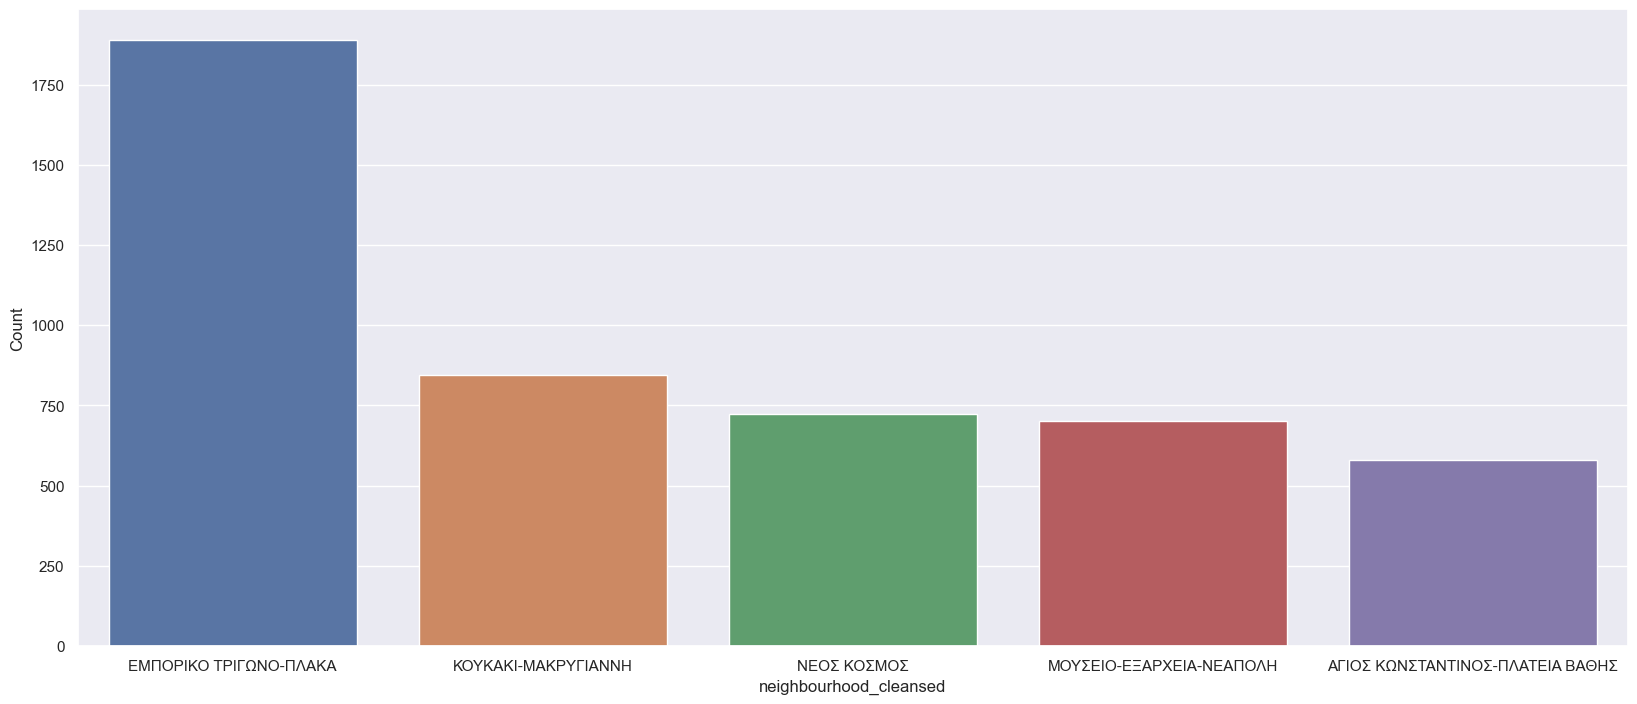

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ΝΕΟΣ ΚΟΣΜΟΣ  ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ  \
Stats                                                                  
min                       7.0        12.00                      10.0   
25%                      48.0        36.00                      33.0   
50%                      70.0        47.00                      45.0   
75%                     105.0        66.25                      65.0   
max                    8000.0      8000.00                    8000.0   

       ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  
Stats                                                         
min                                11.0                 14.0  
25%                                34.5                 42.0  
50%                                44.0                 60.0  
75%                                63.0                 89.0  
max                               500.0               8000.0

In [20]:
# Ανακαλύπτω τις πιο δημοφιλής γειτονιές στην Αθήνα
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.countplot(x="neighbourhood_cleansed", data=listings,
              order=listings['neighbourhood_cleansed'].value_counts().iloc[:5].index)

plt.ylabel('Count')
plt.xlabel('neighbourhood_cleansed')
plt.show()

#Εξερεύνηση των δημοφιλέστερων γειτονιών

sub_1=listings.loc[listings['neighbourhood_cleansed'] == 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ']
price_sub1=sub_1[['price']]

sub_2=listings.loc[listings['neighbourhood_cleansed'] == 'ΝΕΟΣ ΚΟΣΜΟΣ']
price_sub2=sub_2[['price']]

sub_3=listings.loc[listings['neighbourhood_cleansed'] == 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ']
price_sub3=sub_3[['price']]

sub_4=listings.loc[listings['neighbourhood_cleansed'] == 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ']
price_sub4=sub_4[['price']]

sub_5=listings.loc[listings['neighbourhood_cleansed'] == 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ']
price_sub5=sub_5[['price']]
# Προσθήκη όλων των τιμών στην λίστα
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

p_l_b_n_2=[]

nei_list=['ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ']
# Εξαγωγή στατιστικών στοιχείων
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

# Αλλαγή ονομάτων για ευκολότερη ανάγνωση του πίνακα   
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)

# Οπτικοποίηση αποτελεσμάτων  
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df



In [21]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
!pip install folium


# Δημιουργούμε τον χάρτη
airbnb_map = folium.Map(location=[listings['latitude'].mean(), listings['longitude'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(airbnb_map)

# Προσθέτουμε μαρκαδόρους για κάθε τοποθεσία
for idx, row in listings.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']], popup=row['neighbourhood_cleansed'],
        icon=folium.Icon(color='purple', icon='home')).add_to(marker_cluster)

# Αποθηκεύουμε τον χάρτη σε ένα αρχείο HTML
airbnb_map.save('airbnb_map.html')